# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

#Adjacency Matrix

In [2]:
def build_graph_from_tasks(tasks_df):
    # Get number of tasks
    num_tasks = tasks_df.shape[0]

    # Initialize an adjacency matrix (graph) with zeros
    adjacency_matrix = np.zeros((num_tasks, num_tasks), dtype=int)

    # Check for overlaps and create edges
    for i in range(num_tasks):
        for j in range(i + 1, num_tasks):
            # Get the start and end times of task i and task j
            start_i, end_i = tasks_df.loc[i, 'Start'], tasks_df.loc[i, 'End']
            start_j, end_j = tasks_df.loc[j, 'Start'], tasks_df.loc[j, 'End']

            # If tasks i and j overlap, add an edge between them in the graph
            if start_i < end_j and start_j < end_i:
                adjacency_matrix[i, j] = 1
                adjacency_matrix[j, i] = 1

    return adjacency_matrix

#Generating Colours

In [3]:
def greedy_coloring(adjacency_matrix):
    num_tasks = adjacency_matrix.shape[0]
    result = [-1] * num_tasks  # Color assignment array (-1 means no color assigned yet)

    # Assign the first color to the first task
    result[0] = 0

    # Available colors for the remaining tasks
    available_colors = [True] * num_tasks

    # Assign colors to remaining tasks
    for task in range(1, num_tasks):
        # Process all adjacent tasks (neighbors) and mark their colors as unavailable
        for neighbor in range(num_tasks):
            if adjacency_matrix[task, neighbor] == 1 and result[neighbor] != -1:
                available_colors[result[neighbor]] = False

        # Find the first available color
        for color in range(num_tasks):
            if available_colors[color]:
                result[task] = color
                break

        # Reset the available color list for the next iteration
        available_colors = [True] * num_tasks

    return result

#Task Interval 1

In [4]:
file_path = '/content/task_intervals_1.csv'
df = pd.read_csv(file_path)

In [5]:
# Build the graph from the task intervals
adjacency_matrix = build_graph_from_tasks(df)
adjacency_matrix

array([[0, 0, 1, 0, 1],
       [0, 0, 1, 1, 1],
       [1, 1, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [1, 1, 1, 1, 0]])

In [6]:
# Apply the greedy coloring algorithm to the task graph
coloring_result = greedy_coloring(adjacency_matrix)

# Map colors (servers) to task names
task_colors = dict(zip(df['Task'], coloring_result))

task_colors

{'t0': 0, 't1': 0, 't2': 1, 't3': 1, 't4': 2}

<ipython-input-7-7a2de546a86c>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_colors)


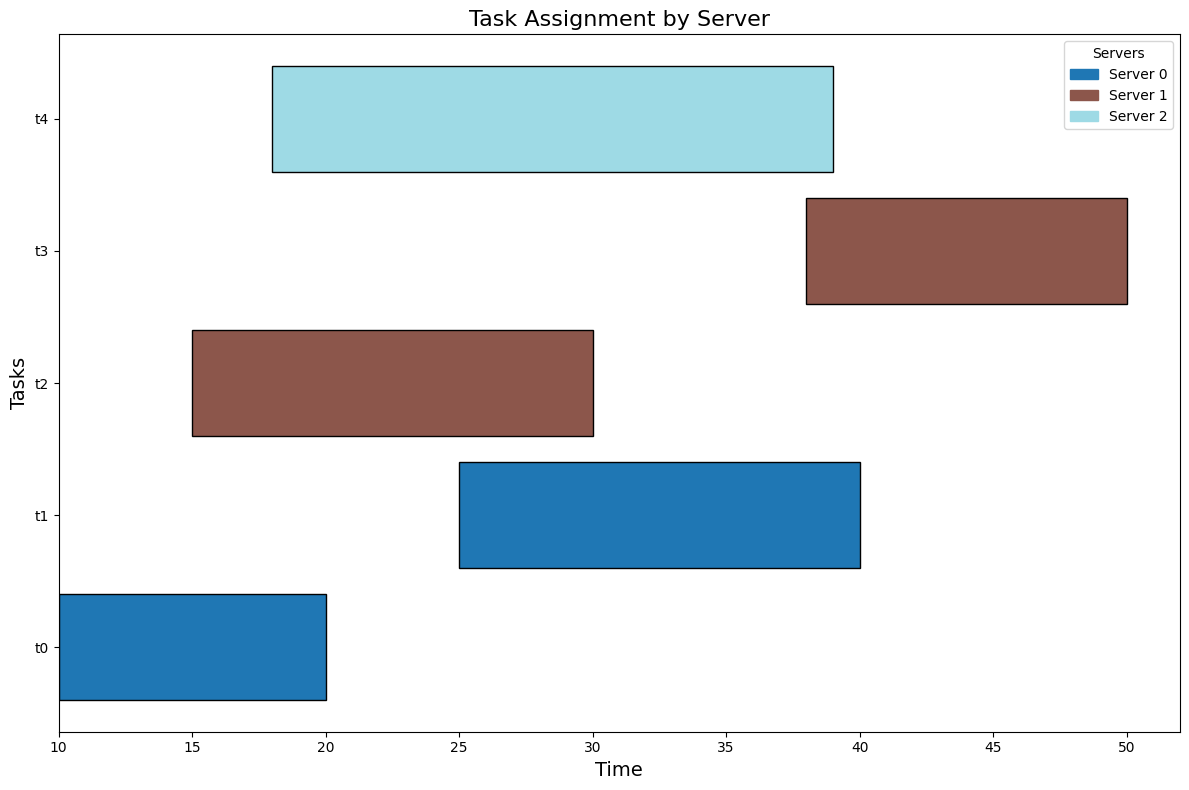

In [7]:
# Generate distinct colors for each server
num_colors = len(set(coloring_result))
colors = plt.cm.get_cmap('tab20', num_colors)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through tasks and add bars to the plot
for idx, row in df.iterrows():
    task = row['Task']
    start = row['Start']
    end = row['End']
    server = task_colors[task]
    ax.barh(task, end - start, left=start, color=colors(server), edgecolor='black')

# Add title and labels
ax.set_title('Task Assignment by Server', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Tasks', fontsize=14)

# Create legend for servers
handles = [mpatches.Patch(color=colors(i), label=f'Server {i}') for i in range(num_colors)]
ax.legend(handles=handles, title="Servers", loc='upper right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

# Task Interval 5

In [8]:
file_path = '/content/task_intervals_5.csv'
df = pd.read_csv(file_path)

In [9]:
# Build the graph from the task intervals
adjacency_matrix = build_graph_from_tasks(df)
adjacency_matrix

array([[0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 1, 1, 0]])

In [10]:
# Apply the greedy coloring algorithm to the task graph
coloring_result = greedy_coloring(adjacency_matrix)

# Map colors (servers) to task names
task_colors = dict(zip(df['Task'], coloring_result))

task_colors

{'t0': 0, 't1': 0, 't2': 1, 't3': 1, 't4': 2}

<ipython-input-11-7a2de546a86c>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_colors)


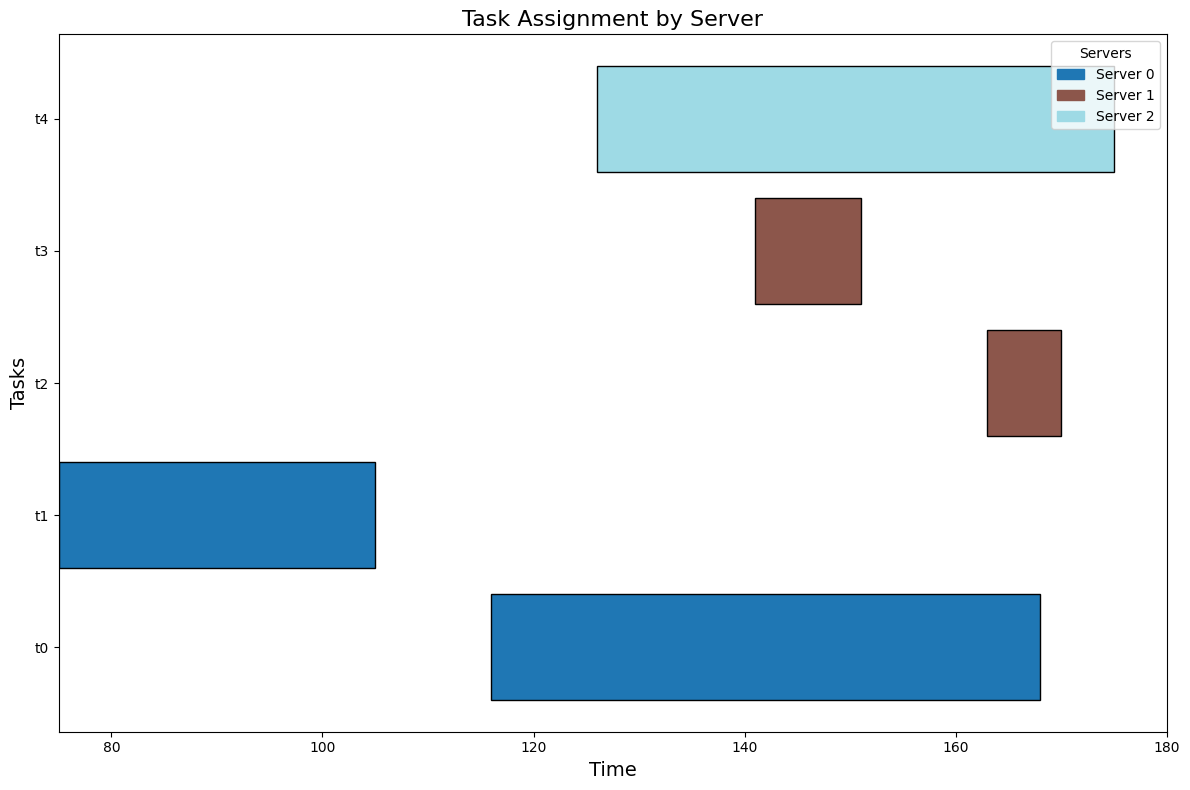

In [11]:
# Generate distinct colors for each server
num_colors = len(set(coloring_result))
colors = plt.cm.get_cmap('tab20', num_colors)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through tasks and add bars to the plot
for idx, row in df.iterrows():
    task = row['Task']
    start = row['Start']
    end = row['End']
    server = task_colors[task]
    ax.barh(task, end - start, left=start, color=colors(server), edgecolor='black')

# Add title and labels
ax.set_title('Task Assignment by Server', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Tasks', fontsize=14)

# Create legend for servers
handles = [mpatches.Patch(color=colors(i), label=f'Server {i}') for i in range(num_colors)]
ax.legend(handles=handles, title="Servers", loc='upper right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

#Task Interval 10

In [12]:
file_path = '/content/task_intervals_10.csv'
df = pd.read_csv(file_path)

In [13]:
# Build the graph from the task intervals
adjacency_matrix = build_graph_from_tasks(df)
adjacency_matrix

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])

In [14]:
# Apply the greedy coloring algorithm to the task graph
coloring_result = greedy_coloring(adjacency_matrix)

# Map colors (servers) to task names
task_colors = dict(zip(df['Task'], coloring_result))

task_colors

{'t0': 0,
 't1': 1,
 't2': 2,
 't3': 3,
 't4': 0,
 't5': 4,
 't6': 3,
 't7': 0,
 't8': 1,
 't9': 5}

<ipython-input-15-7a2de546a86c>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_colors)


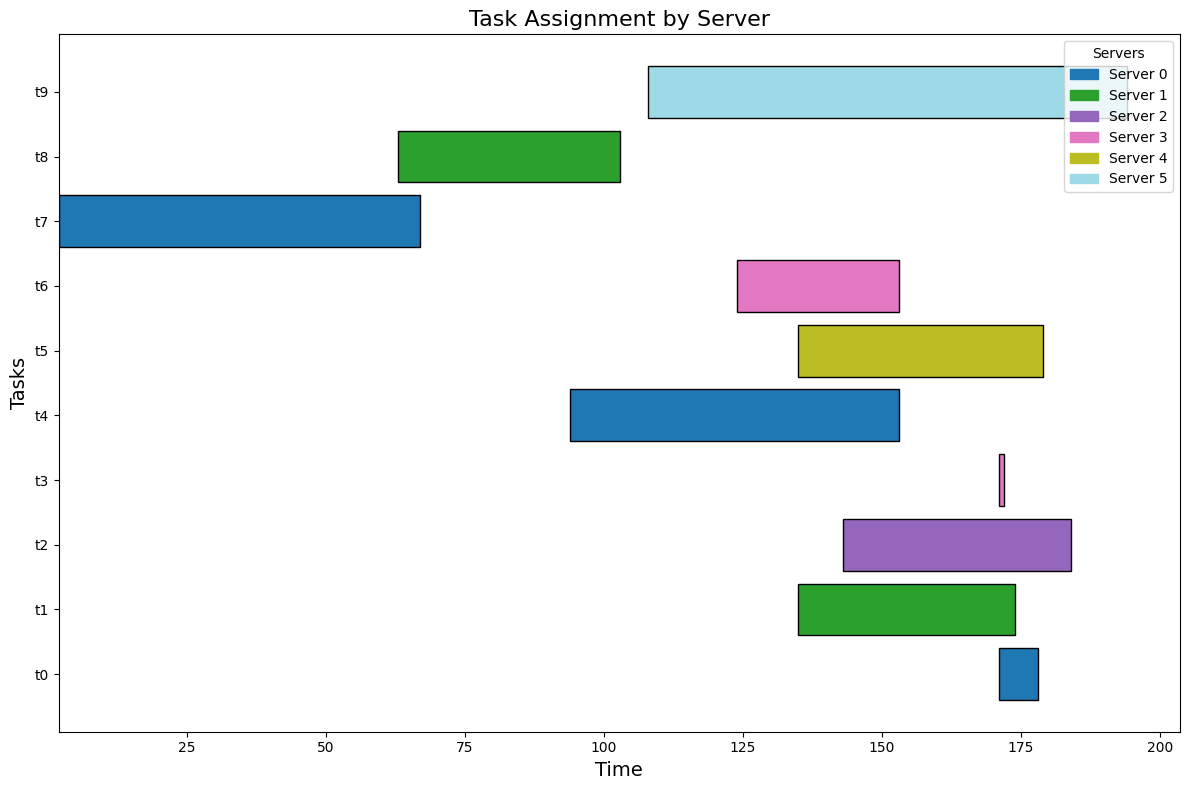

In [15]:
# Generate distinct colors for each server
num_colors = len(set(coloring_result))
colors = plt.cm.get_cmap('tab20', num_colors)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through tasks and add bars to the plot
for idx, row in df.iterrows():
    task = row['Task']
    start = row['Start']
    end = row['End']
    server = task_colors[task]
    ax.barh(task, end - start, left=start, color=colors(server), edgecolor='black')

# Add title and labels
ax.set_title('Task Assignment by Server', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Tasks', fontsize=14)

# Create legend for servers
handles = [mpatches.Patch(color=colors(i), label=f'Server {i}') for i in range(num_colors)]
ax.legend(handles=handles, title="Servers", loc='upper right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

# Task Interval 15

In [16]:
file_path = '/content/task_intervals_15.csv'
df = pd.read_csv(file_path)

In [17]:
# Build the graph from the task intervals
adjacency_matrix = build_graph_from_tasks(df)
adjacency_matrix

array([[0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]])

In [18]:
# Apply the greedy coloring algorithm to the task graph
coloring_result = greedy_coloring(adjacency_matrix)

# Map colors (servers) to task names
task_colors = dict(zip(df['Task'], coloring_result))

task_colors

{'t0': 0,
 't1': 0,
 't2': 0,
 't3': 1,
 't4': 2,
 't5': 3,
 't6': 4,
 't7': 4,
 't8': 5,
 't9': 4,
 't10': 6,
 't11': 1,
 't12': 2,
 't13': 7,
 't14': 6}

<ipython-input-19-7a2de546a86c>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_colors)


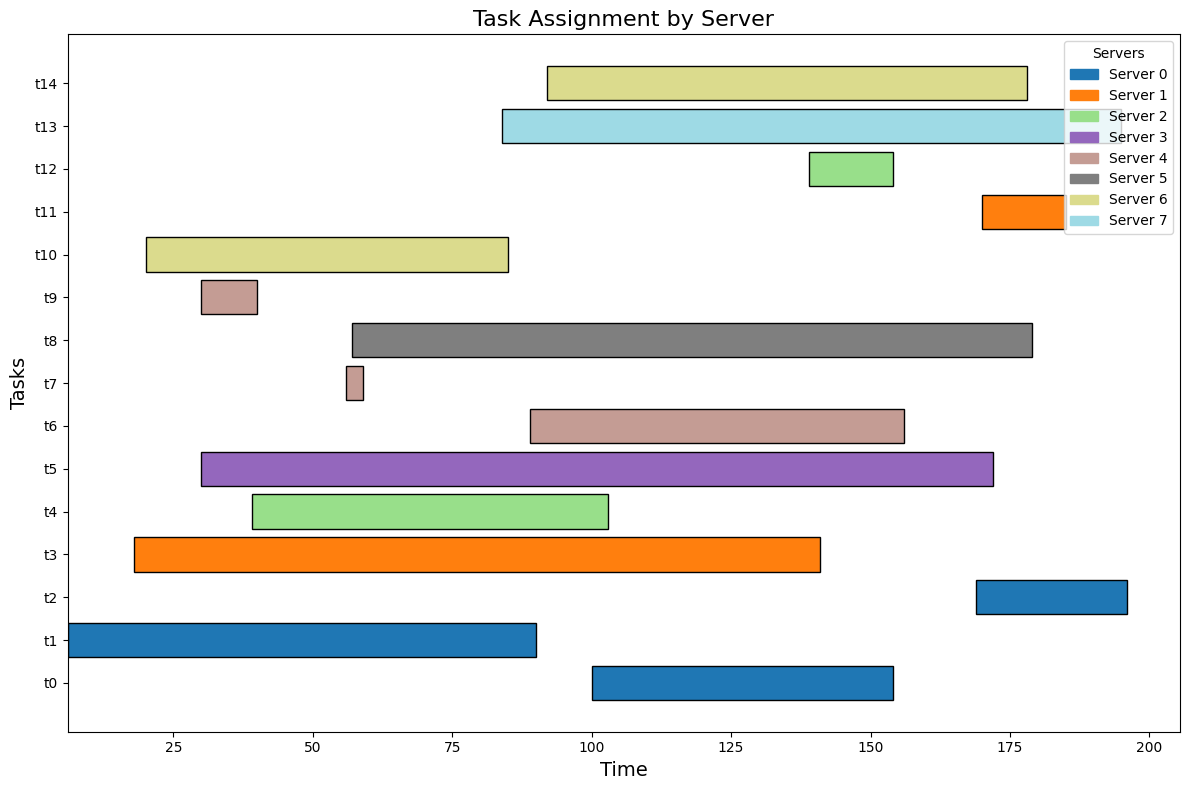

In [19]:
# Generate distinct colors for each server
num_colors = len(set(coloring_result))
colors = plt.cm.get_cmap('tab20', num_colors)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through tasks and add bars to the plot
for idx, row in df.iterrows():
    task = row['Task']
    start = row['Start']
    end = row['End']
    server = task_colors[task]
    ax.barh(task, end - start, left=start, color=colors(server), edgecolor='black')

# Add title and labels
ax.set_title('Task Assignment by Server', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Tasks', fontsize=14)

# Create legend for servers
handles = [mpatches.Patch(color=colors(i), label=f'Server {i}') for i in range(num_colors)]
ax.legend(handles=handles, title="Servers", loc='upper right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

#Task Interval 20

In [20]:
file_path = '/content/task_intervals_20.csv'
df = pd.read_csv(file_path)

In [21]:
# Build the graph from the task intervals
adjacency_matrix = build_graph_from_tasks(df)
adjacency_matrix

array([[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 1, 1,

In [22]:
# Apply the greedy coloring algorithm to the task graph
coloring_result = greedy_coloring(adjacency_matrix)

# Map colors (servers) to task names
task_colors = dict(zip(df['Task'], coloring_result))

task_colors

{'t0': 0,
 't1': 1,
 't2': 0,
 't3': 2,
 't4': 2,
 't5': 3,
 't6': 3,
 't7': 4,
 't8': 5,
 't9': 6,
 't10': 2,
 't11': 7,
 't12': 3,
 't13': 8,
 't14': 9,
 't15': 6,
 't16': 10,
 't17': 9,
 't18': 11,
 't19': 12}

<ipython-input-23-7a2de546a86c>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_colors)


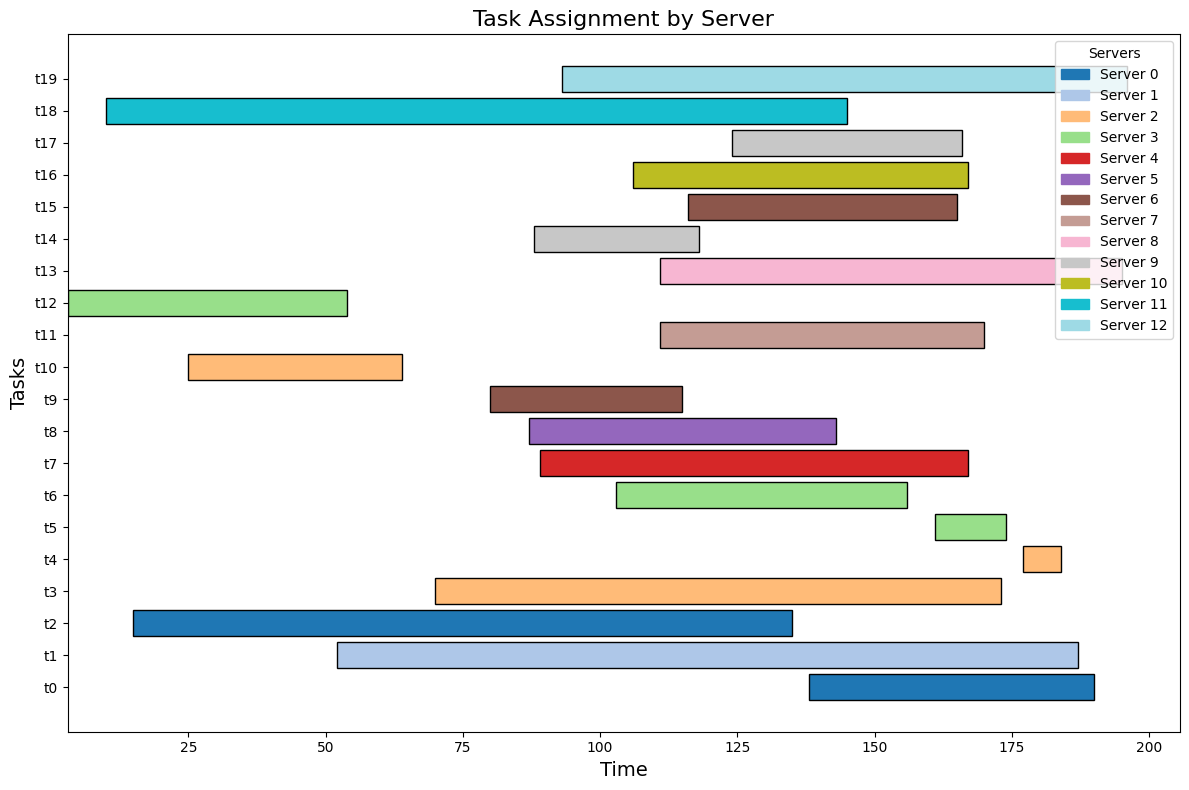

In [23]:
# Generate distinct colors for each server
num_colors = len(set(coloring_result))
colors = plt.cm.get_cmap('tab20', num_colors)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through tasks and add bars to the plot
for idx, row in df.iterrows():
    task = row['Task']
    start = row['Start']
    end = row['End']
    server = task_colors[task]
    ax.barh(task, end - start, left=start, color=colors(server), edgecolor='black')

# Add title and labels
ax.set_title('Task Assignment by Server', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Tasks', fontsize=14)

# Create legend for servers
handles = [mpatches.Patch(color=colors(i), label=f'Server {i}') for i in range(num_colors)]
ax.legend(handles=handles, title="Servers", loc='upper right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

#Task Interval 25

In [24]:
file_path = '/content/task_intervals_25.csv'
df = pd.read_csv(file_path)

In [25]:
# Build the graph from the task intervals
adjacency_matrix = build_graph_from_tasks(df)
adjacency_matrix

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 1],
       [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 1],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
      

In [26]:
# Apply the greedy coloring algorithm to the task graph
coloring_result = greedy_coloring(adjacency_matrix)

# Map colors (servers) to task names
task_colors = dict(zip(df['Task'], coloring_result))

task_colors

{'t0': 0,
 't1': 1,
 't2': 2,
 't3': 3,
 't4': 2,
 't5': 3,
 't6': 4,
 't7': 1,
 't8': 5,
 't9': 4,
 't10': 6,
 't11': 7,
 't12': 6,
 't13': 8,
 't14': 9,
 't15': 9,
 't16': 10,
 't17': 1,
 't18': 0,
 't19': 11,
 't20': 2,
 't21': 3,
 't22': 12,
 't23': 0,
 't24': 6}

<ipython-input-27-7a2de546a86c>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_colors)


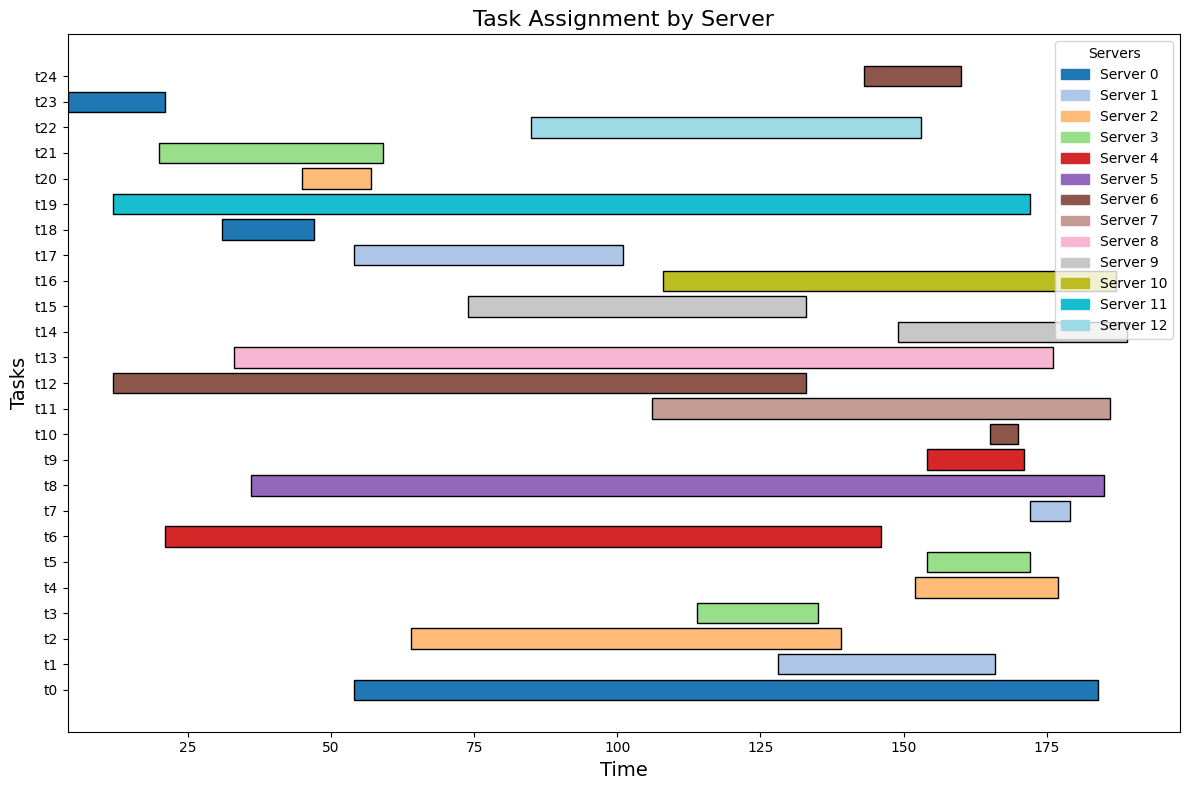

In [27]:
# Generate distinct colors for each server
num_colors = len(set(coloring_result))
colors = plt.cm.get_cmap('tab20', num_colors)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through tasks and add bars to the plot
for idx, row in df.iterrows():
    task = row['Task']
    start = row['Start']
    end = row['End']
    server = task_colors[task]
    ax.barh(task, end - start, left=start, color=colors(server), edgecolor='black')

# Add title and labels
ax.set_title('Task Assignment by Server', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Tasks', fontsize=14)

# Create legend for servers
handles = [mpatches.Patch(color=colors(i), label=f'Server {i}') for i in range(num_colors)]
ax.legend(handles=handles, title="Servers", loc='upper right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

#Task Interval 30

In [28]:
file_path = '/content/task_intervals_30.csv'
df = pd.read_csv(file_path)

In [29]:
# Build the graph from the task intervals
adjacency_matrix = build_graph_from_tasks(df)
adjacency_matrix

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [30]:
# Apply the greedy coloring algorithm to the task graph
coloring_result = greedy_coloring(adjacency_matrix)

# Map colors (servers) to task names
task_colors = dict(zip(df['Task'], coloring_result))

task_colors

{'t0': 0,
 't1': 1,
 't2': 2,
 't3': 3,
 't4': 3,
 't5': 1,
 't6': 4,
 't7': 5,
 't8': 1,
 't9': 6,
 't10': 2,
 't11': 0,
 't12': 7,
 't13': 8,
 't14': 1,
 't15': 4,
 't16': 9,
 't17': 10,
 't18': 5,
 't19': 11,
 't20': 12,
 't21': 1,
 't22': 13,
 't23': 14,
 't24': 5,
 't25': 15,
 't26': 6,
 't27': 9,
 't28': 16,
 't29': 0}

<ipython-input-31-7a2de546a86c>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_colors)


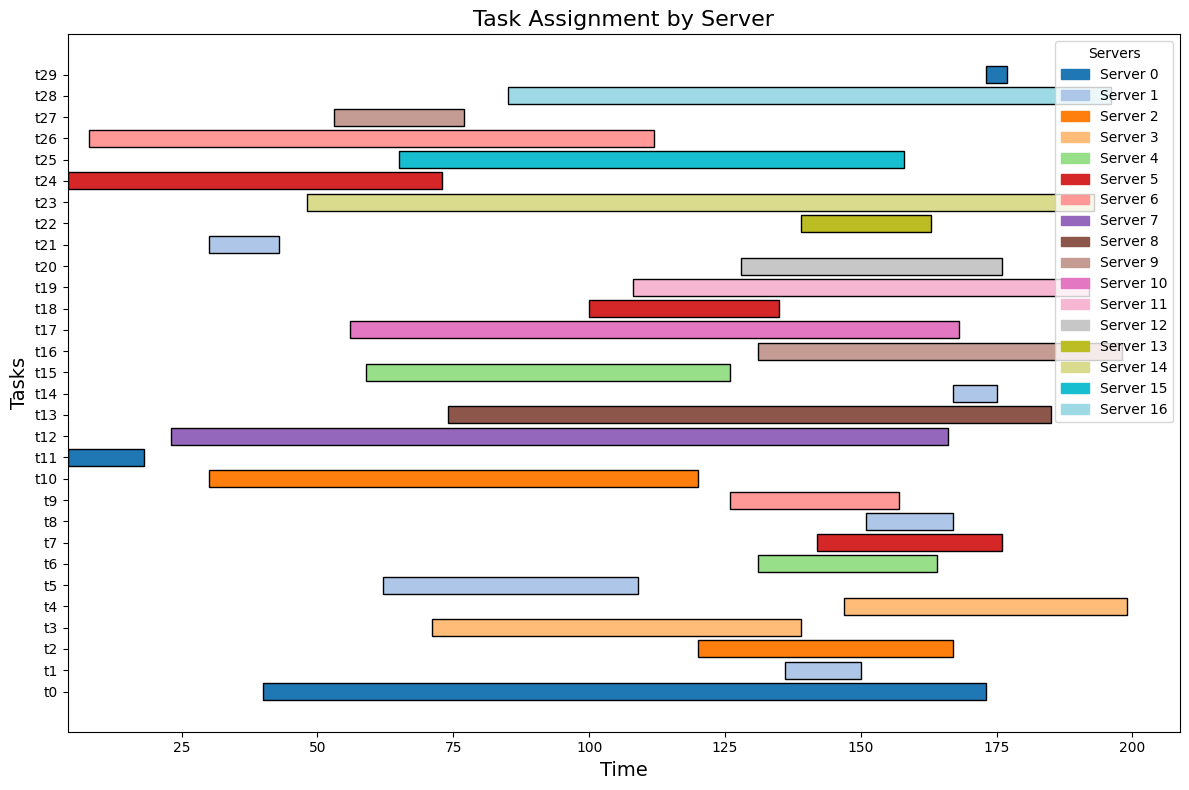

In [31]:
# Generate distinct colors for each server
num_colors = len(set(coloring_result))
colors = plt.cm.get_cmap('tab20', num_colors)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through tasks and add bars to the plot
for idx, row in df.iterrows():
    task = row['Task']
    start = row['Start']
    end = row['End']
    server = task_colors[task]
    ax.barh(task, end - start, left=start, color=colors(server), edgecolor='black')

# Add title and labels
ax.set_title('Task Assignment by Server', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Tasks', fontsize=14)

# Create legend for servers
handles = [mpatches.Patch(color=colors(i), label=f'Server {i}') for i in range(num_colors)]
ax.legend(handles=handles, title="Servers", loc='upper right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()